In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Cleaning Data

In [4]:
df.drop('Cabin', axis=1, inplace=True)

In [5]:
df['Age'] = df['Age'].fillna(round(df['Age'].mean()))

In [6]:
df.dropna(inplace=True)

# Feature Engineering

In [7]:
df_numerical = df.select_dtypes(exclude='object')

In [8]:
df_categorical=df.select_dtypes(include='object')

In [9]:
x = pd.get_dummies(df, columns=['Sex','Embarked'], drop_first=True).drop(['Name','Ticket','PassengerId','Survived'],axis=1)
y = df['Survived']

# Modelling

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix,classification_report

In [11]:
#split the data
x_train,x_test,y_train, y_test = tts(x,y, test_size=0.2, random_state=101)

In [12]:
#train model
model_1 = LogisticRegression()

In [13]:
model_1.fit(x_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
test_1 = x_test.iloc[1].values

In [15]:
model_1.predict([test_1])

array([0], dtype=int64)

# Evaluate the Model

In [16]:
prediction = model_1.predict(x_test)

In [17]:
len(y_test)

178

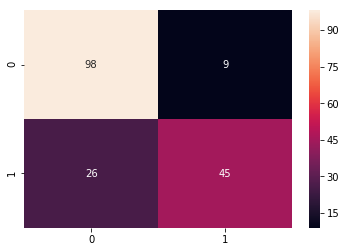

In [18]:
sns.heatmap(confusion_matrix(y_test,prediction), annot=True)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_test,prediction)

0.8033707865168539

In [21]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       107
           1       0.83      0.63      0.72        71

   micro avg       0.80      0.80      0.80       178
   macro avg       0.81      0.77      0.78       178
weighted avg       0.81      0.80      0.80       178



In [22]:
pd.DataFrame(confusion_matrix(y_test,prediction), columns=['predict 0','predict 1'], index=['actual 0','actual 1'])

,predict 0,predict 1
actual 0,98,9
actual 1,26,45


In [23]:
survived = 45/(45+9)
notsurvived = 98/(98+26)

#### Precision : memaksimalkan nilai positif karena costnya besar, berdasarkan kolom predict(vertical)

In [24]:
#letaknya vertical, harus me-nol-kan false positifnya = tn/(tn+fn)


#### Recall : memaksimalkan nilai positif karena costnya besar, berdasarkan kolom actual(horizontal)

In [25]:
#letaknya horizontal, harus me-nol-kan false negativenya = tn/(tn+fp)


### F1 Score = 2 x [(precision*recall)/(precision+recall)]

In [26]:
pd.DataFrame(confusion_matrix(y_test,prediction), columns=['predict 0','predict 1'], index=['actual 0','actual 1'])

,predict 0,predict 1
actual 0,98,9
actual 1,26,45


### Cut Off, cara kak fikri

In [27]:
#default cut off 0.5 --> diturunkan menjadi 0.3

In [28]:
proba = model_1.predict_proba(x_test)
proba[:5]

array([[0.88711565, 0.11288435],
       [0.83671046, 0.16328954],
       [0.27234656, 0.72765344],
       [0.08362208, 0.91637792],
       [0.83245558, 0.16754442]])

In [29]:
prection_cut_off = []
for item in proba [:,0]:
    if item > 0.3:
        prection_cut_off.append(1)
    else : 
        prection_cut_off.append(0)

In [30]:
pd.DataFrame(confusion_matrix(y_test,prection_cut_off), columns=['predict 0','predict 1'], index=['actual 0','actual 1'])

,predict 0,predict 1
actual 0,0,107
actual 1,33,38


### Cut Off, cara data school

In [31]:
from sklearn.preprocessing import binarize
proba_class = binarize(proba, 0.3)[:,1]
#alasan [:1], dikarenakan ingin memprediksi positif terkena diabetes

In [32]:
print(classification_report(y_test,proba_class))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83       107
           1       0.73      0.79      0.76        71

   micro avg       0.80      0.80      0.80       178
   macro avg       0.79      0.80      0.79       178
weighted avg       0.80      0.80      0.80       178



In [33]:
pd.DataFrame(confusion_matrix(y_test,proba_class), columns=['predict 0','predict 1'], index=['actual 0','actual 1'])

,predict 0,predict 1
actual 0,86,21
actual 1,15,56
